 Description
ResNet-50 is a convolutional neural network that is 50 layers deep. the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224
ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). 

In [ ]:
#first to install tensorflow and opencv
#!pip install tensorflow
#!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ResNet50 Pretrained model : residual network
#import standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import cv2

In [ ]:
#to import resnet50 pretrained model , preprocess_input and decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
#work imagenet dataset:
#Total 40000 milion images trained and category : 1000

In [ ]:
#so we know that resnet50 pretrained model trained on image size 224,224,3 color image
#so here is our input image size
img_width,img_height=224,224

In [ ]:
#we are using weight and bias of pretrained model which was stored in imagenet dataset
#so create object of final weight and bias of imagenet dataset
#so it will give all category weight and bias
pretrained_model=ResNet50(weights='imagenet',include_top=True,
                          input_shape=(img_width,img_height,3))
#include_top=True for Check % probability of image
#input is img_width,img_height
#3 for color image

102967424/102967424 [==============================] - 6s 0us/step


In [ ]:
#to check pretrained_model summary
#it will show all layer 
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

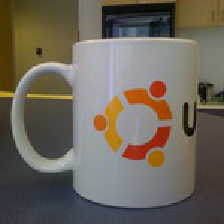

In [ ]:
#to load input image use inbuild method load_img which is define in image class
input_image=("/content/drive/MyDrive/Cv/practice/resnet50/mug.jpg")
from tensorflow.keras.preprocessing import image
img=image.load_img(input_image,target_size=(img_width,img_height))
img

In [ ]:
#to convert image to numpy array
#use inbuilt method img_to_array(input_image) which define in image class
X=image.img_to_array(img)
X

array([[[ 72.,  51.,   8.],
        [ 73.,  52.,   9.],
        [ 73.,  52.,   9.],
        ...,
        [122., 101.,  58.],
        [122., 101.,  58.],
        [122., 101.,  58.]],

       [[ 72.,  51.,   8.],
        [ 73.,  52.,   9.],
        [ 73.,  52.,   9.],
        ...,
        [123., 100.,  58.],
        [123., 100.,  58.],
        [122.,  99.,  57.]],

       [[ 72.,  51.,   8.],
        [ 73.,  52.,   9.],
        [ 73.,  52.,   9.],
        ...,
        [123., 100.,  58.],
        [123., 100.,  58.],
        [122.,  99.,  57.]],

       ...,

       [[ 53.,  50.,  57.],
        [ 56.,  53.,  60.],
        [ 56.,  53.,  60.],
        ...,
        [ 60.,  51.,  52.],
        [ 60.,  51.,  52.],
        [ 62.,  53.,  54.]],

       [[ 53.,  50.,  57.],
        [ 56.,  53.,  60.],
        [ 56.,  53.,  60.],
        ...,
        [ 60.,  51.,  52.],
        [ 60.,  51.,  52.],
        [ 62.,  53.,  54.]],

       [[ 55.,  52.,  59.],
        [ 58.,  55.,  62.],
        [ 58.,  

In [ ]:
#to check shape of input image
X.shape

(224, 224, 3)

In [ ]:
#to check dimension of input image
X.ndim

3

In [ ]:
#but we know that CNN model required 4 dimension 
#so for that expand dimesnion
#use inbuilt numpy function expand_dims
X=np.expand_dims(X,axis=0)

In [ ]:
#to check shape
X.shape
#adding extra dimension in left side for that axis=0 
#and in model summary none is on left side
#so for that dimension added on left side

(1, 224, 224, 3)

In [ ]:
#apply some preprocessing on input image
from tensorflow.keras.applications.resnet50 import preprocess_input
X=preprocess_input(X)

In [ ]:
#predict the input image by predict method
Y_pred=pretrained_model.predict(X).round(2)
print(Y_pred)
#it will show 1000 class probability
#but i dont know label of highest probability class

1/1 [==============================] - 0s 28ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0

In [ ]:
#to show highest probability of image with label
from tensorflow.keras.applications.resnet50 import decode_predictions
result=decode_predictions(Y_pred)
print(result)

[[('n03063599', 'coffee_mug', 0.99), ('n07930864', 'cup', 0.01), ('n15075141', 'toilet_tissue', 0.0), ('n02346627', 'porcupine', 0.0), ('n02321529', 'sea_cucumber', 0.0)]]


In [ ]:
#check top 3 highest probability images use top fucntion
result=decode_predictions(Y_pred,top=3)
print(result)
#here give probability of coffee_mug is 99%

[[('n03063599', 'coffee_mug', 0.99), ('n07930864', 'cup', 0.01), ('n15075141', 'toilet_tissue', 0.0)]]


Conclusion:
Here show coffe_mug probability 99% 
means accuracy given by resnet50 model is best and accurate.